In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

jute           100
lentil         100
coconut        100
kidneybeans    100
pomegranate    100
orange         100
pigeonpeas     100
muskmelon      100
maize          100
watermelon     100
mango          100
apple          100
banana         100
cotton         100
rice           100
blackgram      100
mungbean       100
coffee         100
papaya         100
grapes         100
mothbeans      100
chickpea       100
Name: label, dtype: int64

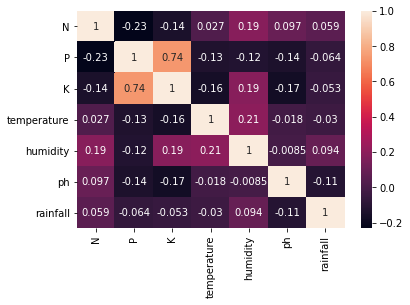

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [ ]:
acc = []
model = []
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=2,max_depth=8)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.37      0.88      0.52        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.75      1.00      0.86        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.00      0.00      0.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.75      0.79      0.77        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTree, 
                out_file='tree.dot', 
                feature_names = ['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall'],
                class_names = ['rice','maize','chickpea','kidneybeans','pigeonpeas','mothbeans',
                               'mungbean','blackgram','lentil','pomegranate','banana','mango','grapes',
                               'watermelon','muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
def smartfarmer():
  f='flood irrigation'
  r='regulated irrigation'
  cd='continuous dripping'
  fr='frequent irrigation'
  sp='sprinkler irrigation'
  d='dripping'
  gr='grooving'
  spr='spraying'
  rw='rapid watering'
  ti='Type of irrigation is: '
  error='ERROR, make sure that the data you entered is correct and try again'
  N=float(input('Enter ratio of nitrogen content in soil: '))
  P=float(input('Enter ratio of phosphorus content in soil: '))
  K=float(input('Enter ratio of potassium content in soil: '))
  if N>300 or N<0 or P>300 or P<0 or K>300 or K<0:
    return error
  T=float(input('Enter temperature in Celsius: '))
  if T>50:
    return error
  H=float(input('Enter relative humidity in %: '))
  if H>100 or H<0:
    return error
  PH=float(input('Enter PH value of the soil: '))
  if PH>12 or PH<2:
    return error
  R=float(input('Enter rainfall in mm: '))
  if R>400 or R<0:
    return error
  data=np.array([[N,P,K,T,H,PH,R]])
  prediction1=DecisionTree.predict(data)
  print('Best crop to plant is: '+str(prediction1))
  if prediction1==['rice']:
    print(ti+f)
  elif prediction1==['maize']:
    print(ti+r)
  elif prediction1==['chickpea']:
    print(ti+r)
  elif prediction1==['lentil']:
    print(ti+cd)
  elif prediction1==['pomegranate']:
    print(ti+fr)
  elif prediction1==['mango']:
    print(ti+sp)
  elif prediction1==['grapes']:
    print(ti+d)
  elif prediction1==['watermelon']:
    print(ti+d+', '+gr+' or '+spr)
  elif prediction1==['muskmelon']:
    print(ti+d)
  elif prediction1==['orange']:
    print(ti+rw)
  elif prediction1==['apple']:
    print(ti+d)
  elif prediction1==['papaya']:
    print(ti+r)
  elif prediction1==['coconut']:
    print(ti+r)
  elif prediction1==['cotton']:
    print(ti+spr)
  elif prediction1==['jute']:
    print(ti+sp)
  elif prediction1==['coffee']:
    print(ti+sp)
  elif prediction1==['banana']:
    print(ti+fr)
  else:
    print('Data unavailable')
smartfarmer()